Instructions: click restart and run all above. Figures will show once the entire notebook has finished running (will take a few minutes)

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import glob
import ipywidgets as widgets
from tqdm import tqdm
%matplotlib notebook

from membranequant import ImageQuant, direcslist, load_image, af_subtraction, save_img

# Assessing inter-embryo reference profile variation

A key assumption of the model is that common reference profiles can be used for all embryos, which we believe to be valid because embryo geometry and imaging conditions are conserved. However, I have previously only performed reference profile calibration on single embryos or multiple embryos in batch, which doesn't give any information about possible inter-embryo variation. Here, I perform calibration on multiple single embryos to test for this

## Cytoplasmic reference profile inter-embryo variation

Performing cytoplasmic reference calibration on a few single embryos to see how variable it is between embryos. Using PKC-3 in a par-3 mutant as before.

### Import data

In [2]:
path = '../test_datasets/dataset3_pkc3_par3mutant'
paths = direcslist(path)
images = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI.txt') for p in paths]

### Run analysis

In [3]:
from scipy.special import erf

sigma = 2
thickness = 50
cytbg = (1 + erf((np.arange(thickness) - thickness / 2) / sigma)) / 2

cytbgs = []
for img, roi in zip(images, rois):
    iq = ImageQuant(img, roi=roi, cyt_only=True, uni_cyt=True, iterations=2, adaptive_cytbg=True, thickness=thickness, cytbg=cytbg, descent_steps=200, nfits=100, freedom=10)
    iq.run()
    cytbgs.append(iq.cytbg)
cytbgs_norm = [x / np.max(x) for x in cytbgs]


  2%|▎         | 5/200 [00:00<00:04, 42.10it/s]

Time elapsed: 9.79 seconds 


  2%|▎         | 5/200 [00:00<00:04, 40.06it/s]

Time elapsed: 10.93 seconds 


  0%|          | 0/200 [00:00<?, ?it/s]

Time elapsed: 11.48 seconds 


  3%|▎         | 6/200 [00:00<00:03, 58.89it/s]

Time elapsed: 9.35 seconds 


  2%|▏         | 4/200 [00:00<00:06, 31.53it/s]

Time elapsed: 13.35 seconds 


100%|██████████| 200/200 [00:06<00:00, 30.33it/s]

Time elapsed: 13.22 seconds 


### Figures

As we can see, the shape of the profile is highly conserved between embryos

(excluding last position as there are sometimes artefacts at this position - not sure why)

<IPython.core.display.Javascript object>


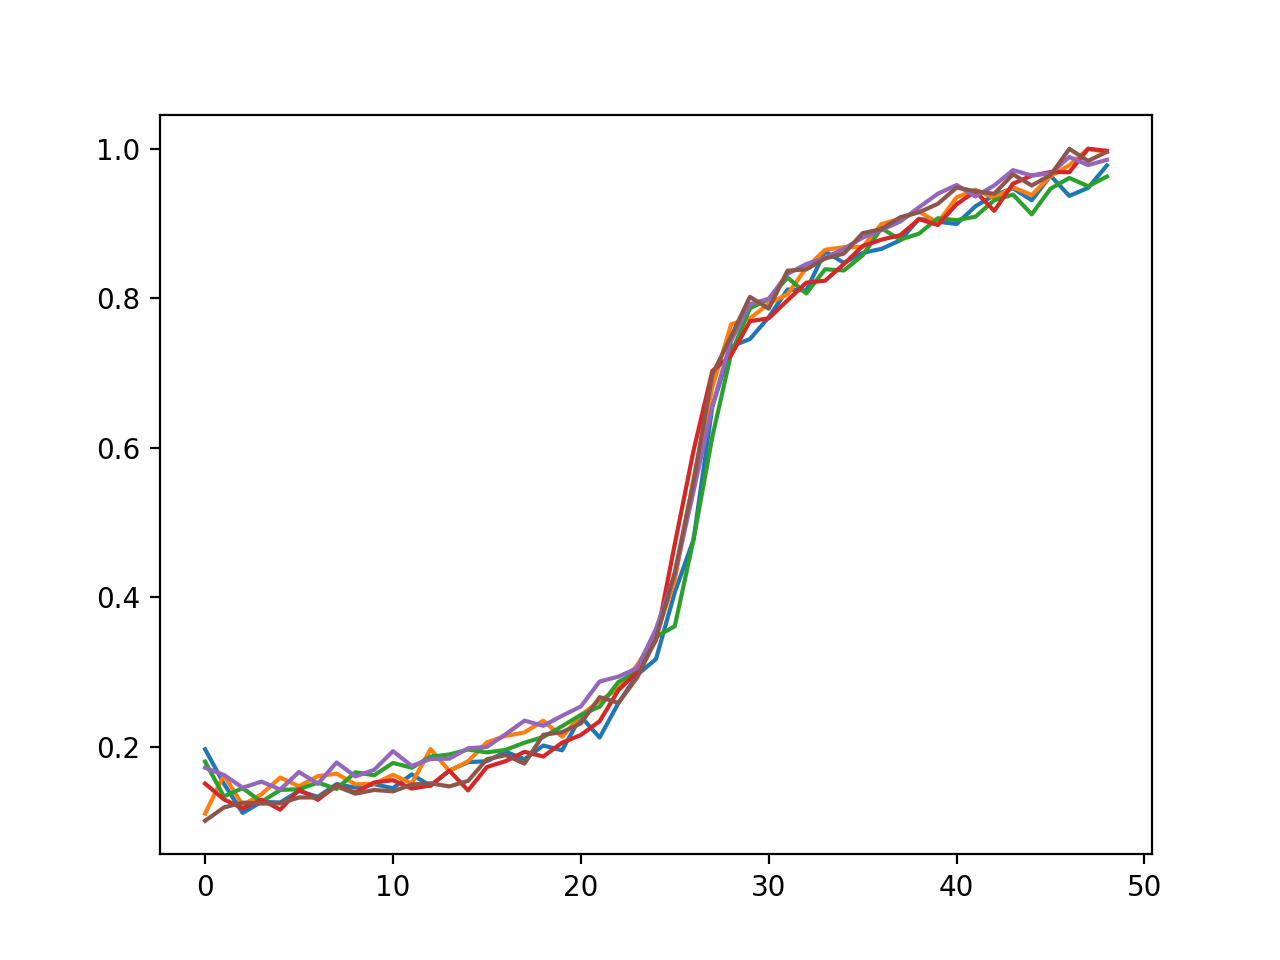

In [4]:
fig, ax = plt.subplots()
for c in cytbgs_norm:
    ax.plot(c[:-1])

<IPython.core.display.Javascript object>


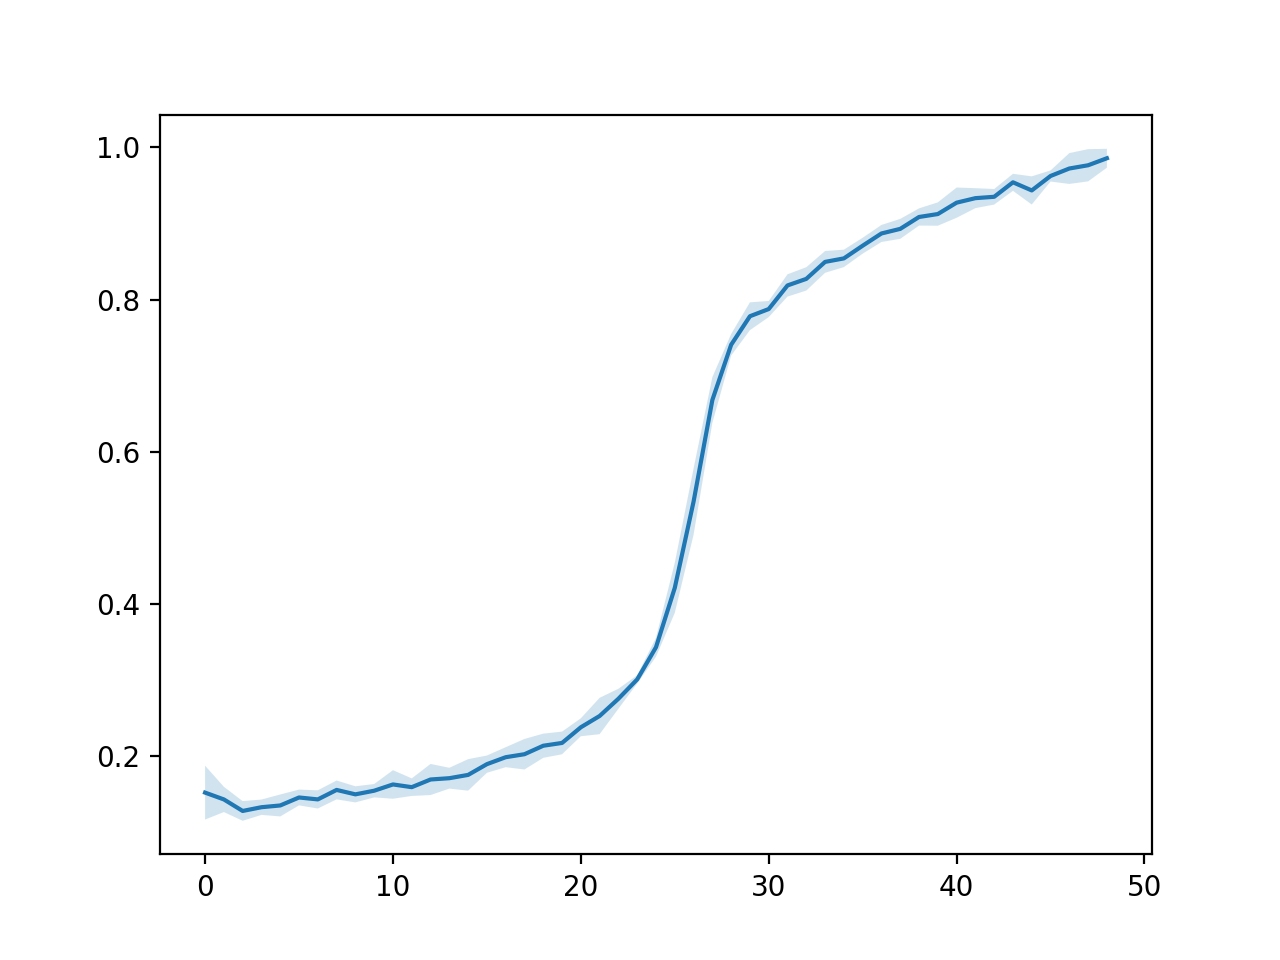

In [5]:
cytbg_arr = np.array(cytbgs_norm)
fig, ax = plt.subplots()
mean = np.mean(cytbg_arr, axis=0)[:-1]
std = np.std(cytbg_arr, axis=0)[:-1]
ax.plot(mean)
ax.fill_between(np.arange(len(mean)), mean-std, mean+std, alpha=0.2)

## Membrane reference profile inter-embryo variation

Performing membrane reference calibration on a few single embryos to see how variable it is between embryos. Using polarised PAR-2 Neon as before, and the cytoplasmic profile generated [here](./5_intro_to_imagequant.ipynb).

### Import data

In [6]:
path2 = '../test_datasets/dataset2_par2_neon'
paths2 = direcslist(path2)
images2 = [load_image(p + '/af_corrected.tif') for p in paths2]
rois2 = [np.loadtxt(p + '/ROI.txt') for p in paths2]

### Run analysis

In [7]:
sigma = 2
thickness = 50
membg = np.exp(-((np.arange(thickness) - thickness / 2) ** 2) / (2 * sigma ** 2))
cytbg = np.loadtxt('saved_cyt_ref_profile.txt')

membgs = []
for img, roi in zip(images2, rois2):
    iq = ImageQuant(img, roi=roi, iterations=2, adaptive_membg=True, thickness=50, cytbg=cytbg, membg=membg, descent_steps=200, uni_cyt=True, nfits=100, freedom=10)
    iq.run()
    membgs.append(iq.membg)
membgs_norm = [x / np.max(x) for x in membgs]


  2%|▏         | 3/200 [00:00<00:07, 26.51it/s]

Time elapsed: 17.64 seconds 


  2%|▏         | 4/200 [00:00<00:06, 31.94it/s]

Time elapsed: 19.28 seconds 


  1%|          | 2/200 [00:00<00:09, 19.86it/s]

Time elapsed: 20.02 seconds 


  2%|▏         | 3/200 [00:00<00:07, 25.06it/s]

Time elapsed: 20.81 seconds 


100%|██████████| 200/200 [00:08<00:00, 23.56it/s]

Time elapsed: 18.45 seconds 


### Figures

As we can see, the shape of the profile is highly conserved between embryos:

<IPython.core.display.Javascript object>


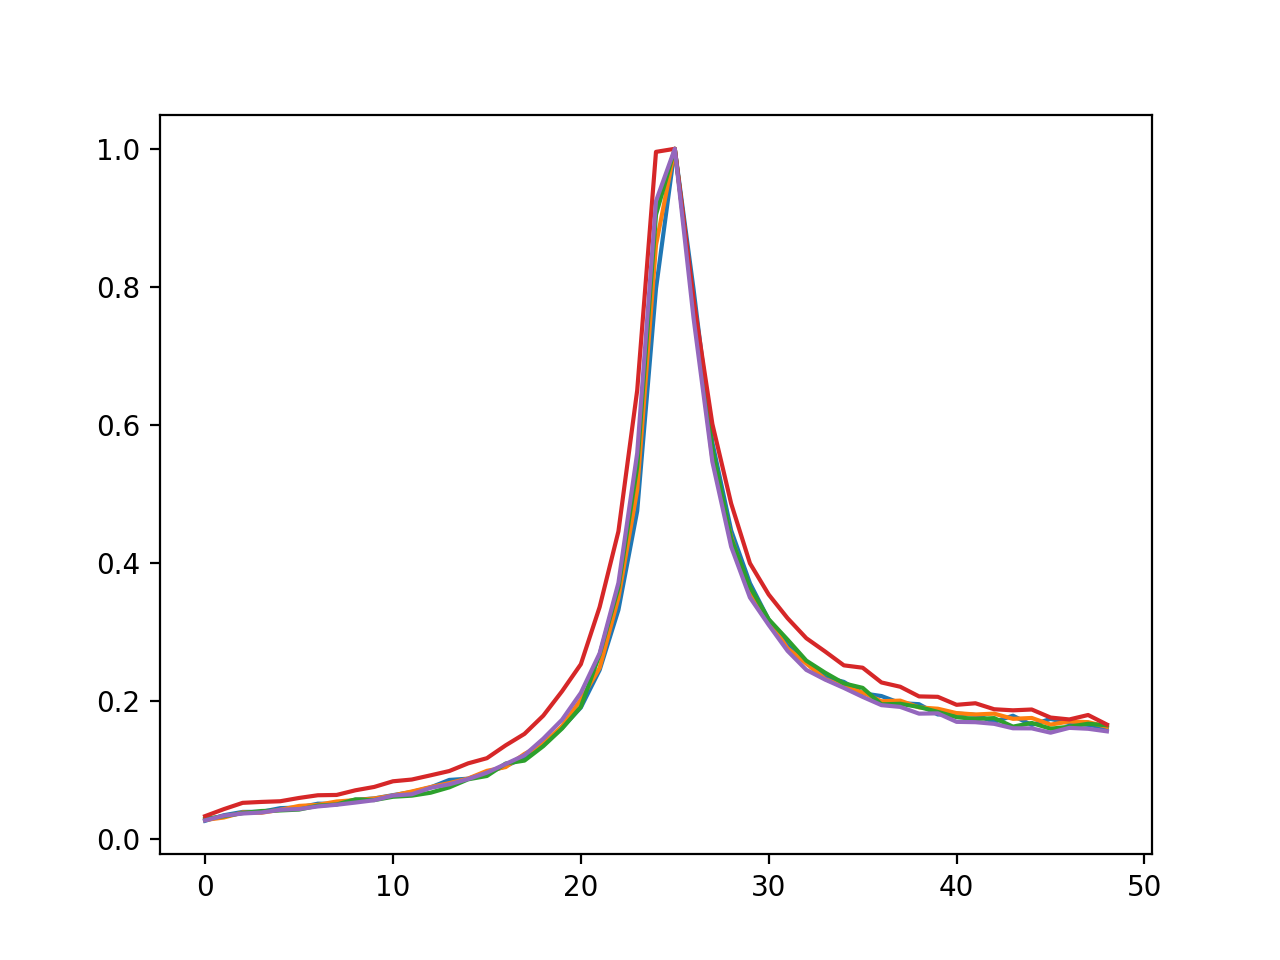

In [8]:
fig, ax = plt.subplots()
for m in membgs_norm:
    ax.plot(m[:-1])

<IPython.core.display.Javascript object>


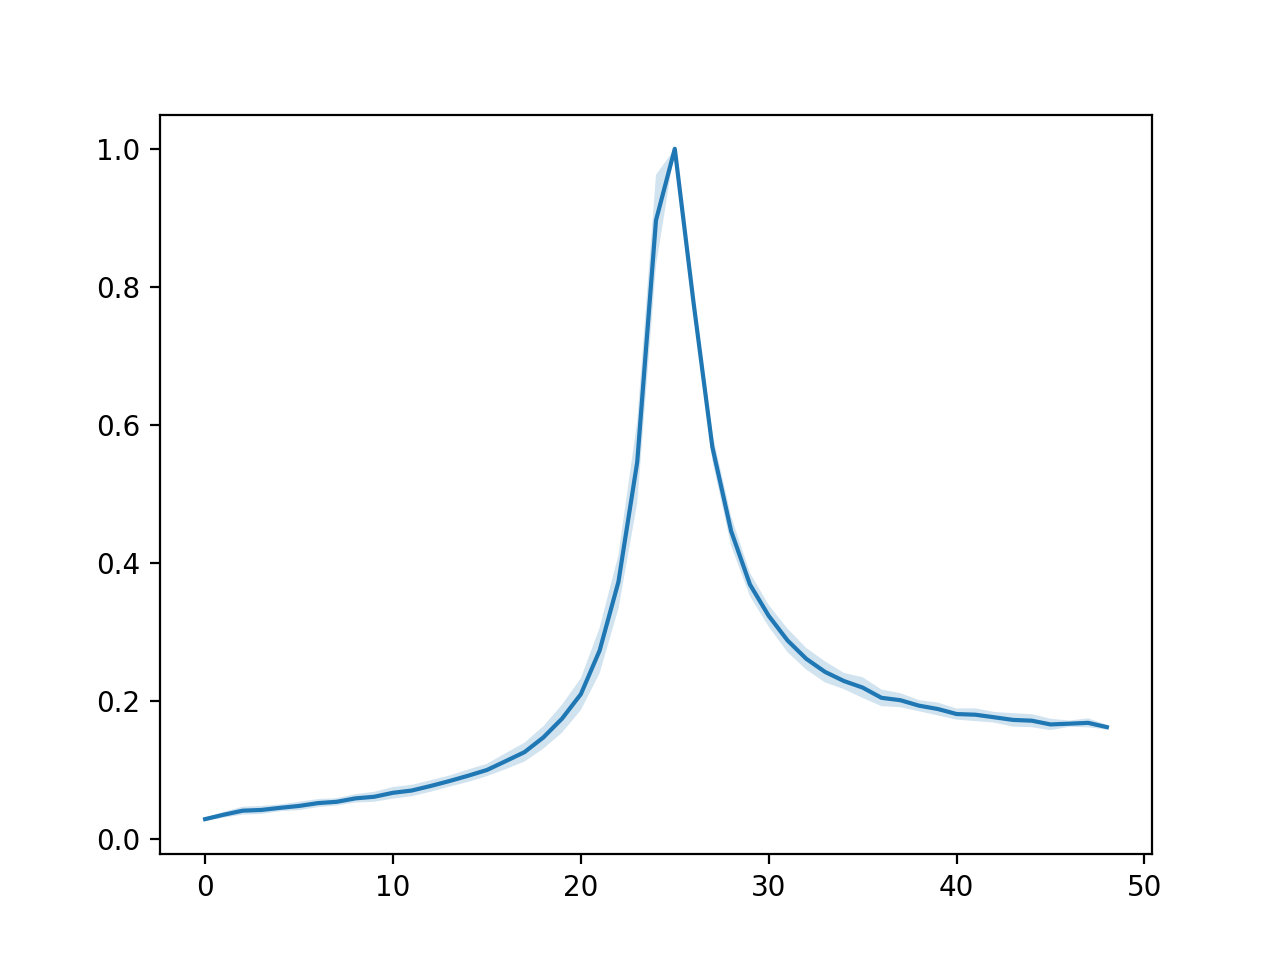

In [9]:
membg_arr = np.array(membgs_norm)
fig, ax = plt.subplots()
mean = np.mean(membg_arr, axis=0)[:-1]
std = np.std(membg_arr, axis=0)[:-1]
ax.plot(mean)
ax.fill_between(np.arange(len(mean)), mean-std, mean+std, alpha=0.2)